In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

##  Status Quo
Given the petal and the sepal length and width, the dataset sorts the flowers into 2 categories: 0, 1 or 2.

We are going to implement 3 different instances of PCA: From Scratch implementation using SVD and eigenvectors, and the Sklearn implementation

# Suubtask 1

In [2]:
data=datasets.load_iris(as_frame=True)
df=data["data"]
df.insert(4, "target", data["target"])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


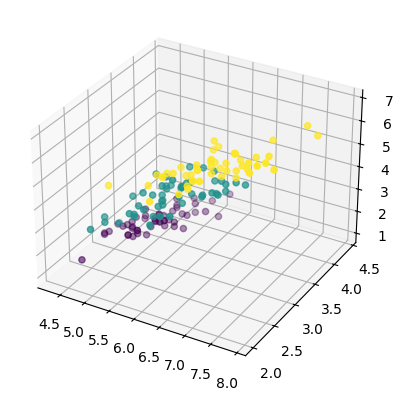

In [3]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(df["sepal length (cm)"], df["sepal width (cm)"], df["petal length (cm)"], c=df["target"])

## Scaling Data

In [4]:
from sklearn.preprocessing import StandardScaler

X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = df["target"]

scaler = StandardScaler()
X=scaler.fit_transform(X)

X=pd.DataFrame(X, columns=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


## Creating the instances

In [5]:
import numpy as np

class myPCA:
    def __init__(self, n_components: int = 2, method: str = "svd") -> None:
        """
        The constructor of the PCA algorithm.
        
        :param n_components: int, default=2
            The number of principal components to retain.
        :param method: str, default='svd'
            The method used for dimensionality reduction ('svd' or 'eigen').
        """
        self.__n_components = n_components
        if method in ['svd', 'eigen']:
            self.__method = method
        else:
            raise ValueError(f"'{method}' is not a supported method in this model")
        
    def fit(self, X: np.ndarray):
        """
        The fitting method.
        
        :param X: np.ndarray
            The data on which to fit PCA.
        """
        if self.__method == 'svd':
            U, S, V = np.linalg.svd(X)
            self.__V = V[:self.__n_components, :]
        elif self.__method == 'eigen':
            corr_mat = np.corrcoef(X.T)
            eig_vals, eig_vecs = np.linalg.eig(corr_mat)

            # Sorting eigenvalues and eigenvectors
            eig_pairs = sorted(
                [(np.abs(eig_vals[i]), eig_vecs[:, i]) for i in range(len(eig_vals))],
                key=lambda x: x[0], reverse=True
            )
            self.__eig_vals = eig_vals
            self.__explained_variance_ratio = [(i/sum(eig_vals)) * 100 for i in sorted(eig_vals, reverse=True)]
            self.__cumulative_variance_ratio = np.cumsum(self.__explained_variance_ratio)
            
            # Projection matrix
            self.__matrix_w = np.hstack([eig_pairs[i][1].reshape(X.shape[1], 1) for i in range(self.__n_components)])
        
        return self

    def transform(self, X: np.ndarray) -> np.ndarray:
        """
        Transforms the data to the lower-dimensional space.
        
        :param X: np.ndarray
            The data to reduce.
        :return: np.ndarray
            The transformed data.
        """
        if not hasattr(self, '_myPCA__V') and not hasattr(self, '_myPCA__matrix_w'):
            raise AttributeError("Model must be fitted before calling transform.")
        
        if self.__method == 'svd':
            return X.dot(self.__V.T)
        elif self.__method == 'eigen':
            return X.dot(self.__matrix_w)



In [6]:
from  sklearn.decomposition import PCA

#creating the PCAs
PCA_eigen = myPCA(method='eigen', n_components=2)
PCA_svd = myPCA(method='svd', n_components=2)
PCA_sklearn = PCA(n_components=2)

In [7]:
#fitting
PCA_eigen.fit(X)
PCA_svd.fit(X)
PCA_sklearn.fit(X)

PCA(n_components=2)

In [8]:
#creating 3 subdatasets, reducing dimmensionality to 2
x_PCA_eigen = PCA_eigen.transform(X)
x_PCA_svd = PCA_svd.transform(X)
x_PCA_sklearn = PCA_sklearn.transform(X)

In [9]:
x_PCA_sklearn=pd.DataFrame(x_PCA_sklearn, columns=[0, 1])
x_PCA_sklearn

,0,1
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


## Graphs

Text(0.5, 1.0, 'PCA Sklearn')

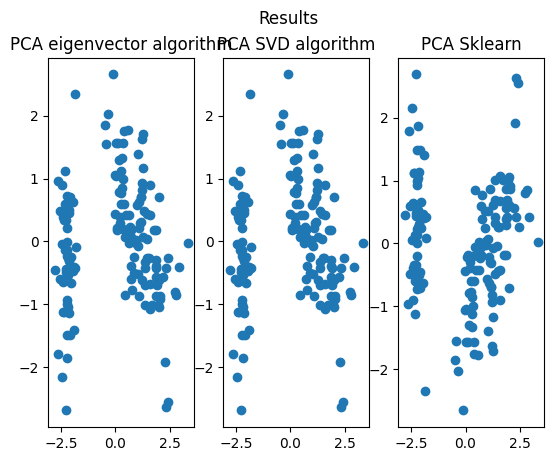

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Results')
ax1.scatter(x_PCA_eigen[0], x_PCA_eigen[1])
ax1.set_title("PCA eigenvector algorithm")
ax2.scatter(x_PCA_svd[0], x_PCA_svd[1])
ax2.set_title("PCA SVD algorithm")
ax3.scatter(x_PCA_sklearn[0], x_PCA_sklearn[1])
ax3.set_title("PCA Sklearn")

## Conclusions
The 3 scatter plots are identical, except for the sklearn one, which is flipped upside down.
Comparing to the first 3D scatter plot of the original data, we can see a resemblance, where the data splits roughly in 3 regions, but all of them being very close

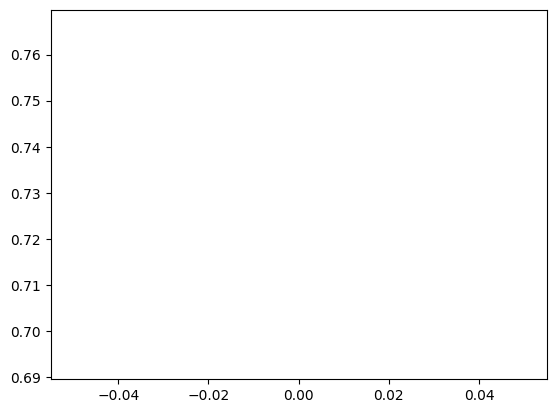

In [11]:
PCA_sklearn2 = PCA(n_components=1)
x_PCA_sklearn2 = PCA_sklearn2.fit_transform(X)

plt.plot(PCA_sklearn2.explained_variance_ratio_)

There is no plot because, the array only has one dimension, so the explained varience ratio is just one value, so i can't plot it on a graph 

# Subtask 2

Loading the digit recongnition dataset from sklearn, and applying PCA to it

In [69]:
digits = datasets.load_digits()
X_digits = digits.data
digits.target

array([0, 1, 2, ..., 8, 9, 8])

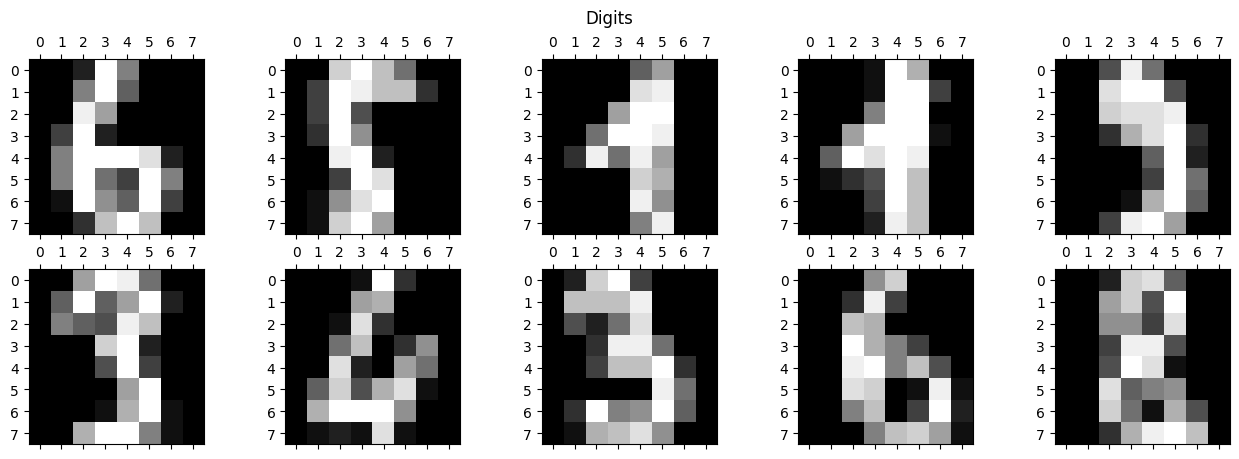

In [80]:
fig, ax = plt.subplots(2, 5, figsize = (16, 5)) #creating subplots
fig.suptitle('Digits')

for i in range(2):
    for j in range(5):
        ax[i][j].matshow(digits.images[np.random.randint(digits.data.shape[0])]) #indexing each graph, and showing a random image image from the dataset


In [64]:
digit_PCA = PCA(n_components=2) #creating PCA

X_digits=scaler.fit_transform(X_digits) #scaling the data

X_digits=pd.DataFrame(X_digits)  #tradnsforming to pandas dataframe
X_digits.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,-0.335016,-0.043081,0.274072,-0.664478,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,0.086719,0.208293,-0.366771,-1.146647,-0.505670,-0.196008
1,0.0,-0.335016,-1.094937,0.038648,0.268751,-0.138020,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-0.249010,0.849632,0.548561,-0.505670,-0.196008
2,0.0,-0.335016,-1.094937,-1.844742,0.735366,1.097673,-0.409724,-0.125023,-0.059078,-0.624009,...,0.259230,-0.209785,-0.023596,-0.299081,-1.089383,-2.078218,-0.164037,1.565686,1.695137,-0.196008
3,0.0,-0.335016,0.377661,0.744919,0.268751,-0.844129,-0.409724,-0.125023,-0.059078,1.879691,...,1.072563,-0.209785,-0.023596,-0.299081,0.282736,0.208293,0.241430,0.379040,-0.505670,-0.196008
4,0.0,-0.335016,-1.094937,-2.551014,-0.197863,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-2.306869,0.849632,-0.468564,-0.505670,-0.196008


In [67]:
X_tarnsformed = digit_PCA.fit_transform(X_digits)  #fitting and applying PCA
X_tarnsformed=pd.DataFrame(X_tarnsformed) #transforming to pandas dataframe
X_tarnsformed.head()

,0,1
0,-1.259466,-21.274883
1,7.957611,20.768699
2,6.991923,9.955986
3,-15.906105,-3.332464
4,23.306867,-4.269061


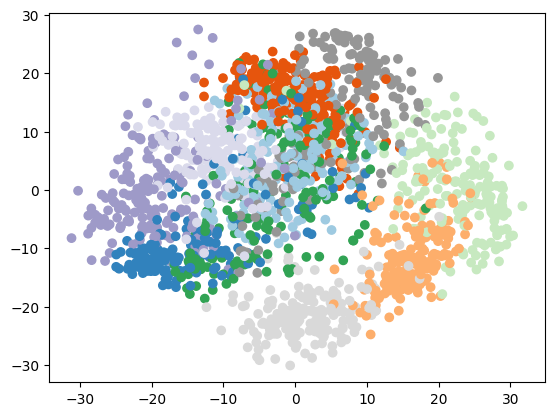

In [79]:
plt.scatter(X_tarnsformed[0], X_tarnsformed[1], c=digits.target, cmap='tab20c_r') #plotting the data

## Conclusions
In the final scatter plot, we see 10 colors, all representing a single digit, and grouped with similar datapoints, showing the PCA worked as it should